 ## 7. Geometry by Motion

In [77]:
from matplotlib import (
    cm,
    pyplot
)

from sympy import (
    cos,
    Eq,
    Line,
    pi,
    Point,
    Polygon,
    Segment,
    sin,
    Triangle
)

In [4]:
class Translation:
    """ Translates all objects on the plane. """

    def __init__(self, x: float, y: float):
        """
        x_val: value to move.
        y_val: value to move.
        """
        self.x = x
        self.y = y
        self.is_Point = False

    def __repr__(self):
        return 'Translation(' + str(self.x) + ', ' + str(self.y) + ')'

    def __str__(self):
        return 'Translation(' + str(self.x) + ', ' + str(self.y) + ')'

    def __add__(self, T2):
        x_new = self.x + T2.x
        y_new = self.y + T2.y
        return Translation(x_new, y_new)

    def translate(self, plane: list, inverse=False):
        """
        plane: a list of objects on the plane.
        inverse: do the inverse of the transformation.
        """
        new_plane = list()

        x_val = self.x
        y_val = self.y

        if inverse:
            x_val *= -1
            y_val *= -1

        for o in plane:
            if o.is_Point:
                new_plane.append(o.translate(x = x_val, y = y_val))
            elif hasattr(o, 'points'):
                t = type(o)
                pnts = [p.translate(x = x_val, y = y_val) for p in o.points]
                new_plane.append(t(*pnts))
            else:
                t = type(o)
                pnts = [p.translate(x = x_val, y = y_val) for p in o.vertices]
                new_plane.append(t(*pnts))
        
        return new_plane

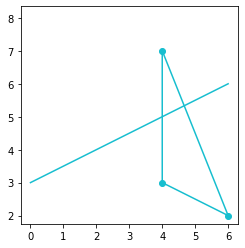

In [5]:
def plane_plot(*args, transArrows = False):
    """
    Plot all objects on the plane.

    *args: a list or lists of objects to plot.
    """
    groups = list(args)
    translations = [x for x in groups if isinstance(x, Translation)]
    groups = [x for x in groups if not isinstance(x, Translation)]
    groups = [[x] if not isinstance(x, list) else x for x in groups]

    colors = list(cm.tab10.colors)
    pyplot.axes()

    for group in groups:
        c = colors.pop()
        for o in group:
            if o.is_Point:
                pyplot.plot(o.x, o.y, 'o', color = c)
            elif hasattr(o, 'points'):
                xs = [l.x for l in o.points]
                ys = [l.y for l in o.points]
                pyplot.plot(xs, ys, color = c)
            else:
                xs = [l.x for l in o.vertices]
                xs.append(xs[0])
                ys = [l.y for l in o.vertices]
                ys.append(ys[0])
                pyplot.plot(xs, ys, color = c)

    pyplot.axis('square')

    if translations:
        ax = pyplot.gca()
        x0, x1 = ax.get_xlim()
        xCentre = x1 - ((x1 - x0) / 2)
        y0, y1 = ax.get_ylim()
        yCentre = y1 - ((y1 - y0) / 2)
        t = 0
        for trans in translations:
            t += 1
            pyplot.annotate(
                str(t),
                xy = (xCentre, yCentre),
                xytext = (xCentre + trans.x, yCentre + trans.y),
                arrowprops = dict(arrowstyle = "<-")
            )
            xCentre += trans.x
            yCentre += trans.y

    pyplot


A1 = Point(4, 7)
B1 = Point(6, 2)
C1 = Point(4, 3)
ABC1 = Triangle(A1, B1, C1)
l1 = Line(Point(0, 3), Point(6, 6))

Pl1 = [A1, B1, C1, ABC1, l1]
plane_plot(Pl1)

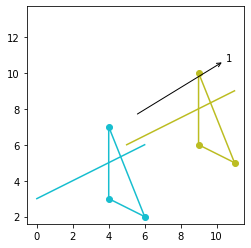

In [6]:
T1 = Translation(5, 3)
Pl2 = T1.translate(Pl1)
plane_plot(Pl1, Pl2, T1)

**Theorem 1**

> Any motion which leaves each of three non-collinear points fixed is the identity.

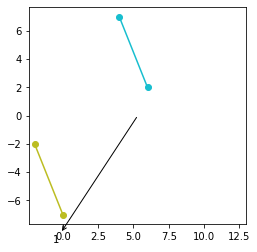

In [7]:
A1B1 = Line(A1, B1)
Pl3 = [A1, B1, A1B1]
T2 = Translation(-6, -9)
Pl4 = T2.translate(Pl3)
plane_plot(Pl3, Pl4, T2)

In [8]:
Pl3 == T2.translate(Pl4, inverse=True)

True

In [9]:
A2, B2, A2B2 = Pl4
A1A2 = Line(A1, A2)
B1B2 = Line(B1, B2)
A1A2.is_parallel(B1B2)

True

In [10]:
A2B2.is_parallel(A1B1)

True

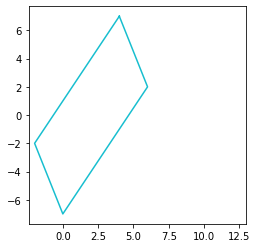

In [11]:
Pl5 = [Polygon(A1, A2, B2, B1)]
plane_plot(Pl5)

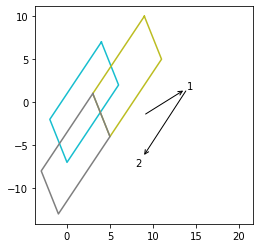

In [12]:
Pl6 = T1.translate(Pl5)
Pl7 = T2.translate(Pl6)
plane_plot(Pl5, Pl6, Pl7, T1, T2)

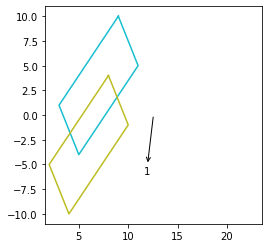

In [13]:
T3 = T1 + T2
Pl8 = T3.translate(Pl6)
plane_plot(Pl6, Pl8, T3)

**Theorem 2**

> If the distinct segments 0A & 0A' are congruent, with 0 $\neq$ A, there is exactly one rotation R about 0 taking A to A'.

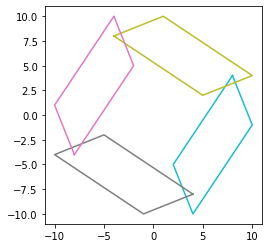

In [103]:
class Rotation():
    """ Rotates all objects on the plane. """

    def __init__(self, ang: float, p=Point(0, 0)):
        """
        x: The point to rotate around.
        ang: The angle to rotate.
        """
        self.p = p
        self.ang = ang

    def __repr__(self):
        return 'Rotation(' + str(self.p) + ', ' + str(self.ang) + ')'

    def __str__(self):
        return 'Rotation(' + str(self.p) + ', ' + str(self.ang) + ')'

    def __add__(self, T2):
        if not(self.p.x == T2.p.x and self.p.y == T2.p.y):
            raise ValueError('Rotations are not around same point')
        else:
            new_ang = self.ang + T2.ang
            return Rotation(new_ang, self.p)

    def rotate(self, plane: list, reverse=False):
        """
        plane: a list of objects on the plane.
        reverse: rotate the opposite direction.
        """
        new_plane = list()

        ang = self.ang
        if reverse:
            ang = ang * -1

        for o in plane:
            if o.is_Point:
                new_plane.append(o.rotate(ang, self.p))
            elif hasattr(o, 'points'):
                t = type(o)
                pnts = [p.rotate(ang, self.p) for p in o.points]
                new_plane.append(t(*pnts))
            else:
                t = type(o)
                pnts = [p.rotate(ang, self.p) for p in o.vertices]
                new_plane.append(t(*pnts))
        
        return new_plane


R1 = Rotation(pi/2)
Pl9 = R1.rotate(Pl8)
Pl10 = R1.rotate(Pl8, reverse=True)
R2 = Rotation(pi)
Pl11 = R2.rotate(Pl8)
plane_plot(Pl8, Pl9, Pl10, Pl11)

In [104]:
OO = Point(0, 0)
A3 = Point(cos(1), sin(1))
A4 = Point(cos(2.5), sin(2.5))
OO.is_collinear(A3, A4)

False

In [105]:
OOA3 = Segment(OO, A3)
OOA4 = Segment(OO, A4)
OOA3.length.evalf() == OOA4.length.evalf()

False

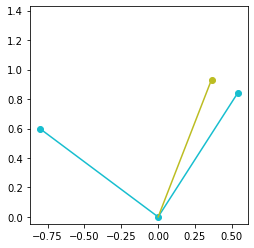

In [106]:
X1 = Point(cos(1.2), sin(1.2))
OOX1 = Segment(OO, X1)
Pl12 = [OO, A3, A4, OOA3, OOA4]
Pl13 = [X1, OOX1]
plane_plot(Pl12, Pl13)

In [107]:
def line_side(l: Line, p: Point):
    """ Obtain the side of a line a point is on. """
    A, B = l.points
    z = ((B.x - A.x) * (p.y - A.y) - (B.y - A.y) * (p.x - A.x)).evalf()
    sign = 0
    if (z < 0):
        sign = -1
    elif (z > 0):
        sign = 1
    return sign


line_side(OOX1, A4)

1

In [108]:
line_side(OOX1, A3)

-1

In [109]:
line_side(OOX1, X1)

0

In [110]:
def rotate_anticlockwise(OO: Point, X: Point, A1: Point, A2: Point):
    """ Determine which way to rotate the angle. """
    OOA1 = Line(OO, A1)
    same_side = line_side(OOA1, X) == line_side(OOA1, A2)
    return same_side


rotate_anticlockwise(OO, X1, A3, A4)

True

In [111]:
Y1 = Point(Point(cos(.5), sin(.5)))
rotate_anticlockwise(OO, Y1, A3, A4)

False

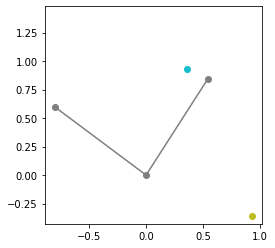

In [112]:
X2 = R1.rotate([X1], reverse=rotate_anticlockwise(OO, X1, A3, A4))
plane_plot(X1, X2, [OO, A3, OOA3, A4, OOA4])

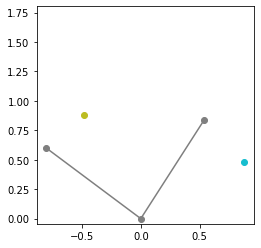

In [113]:
Y2 = R1.rotate([Y1], reverse=rotate_anticlockwise(OO, Y1, A3, A4))
plane_plot(Y1, Y2, [OO, A3, OOA3, A4, OOA4])

In [115]:
OOY1 = Segment(OO, Y1)
ang_X1OOY1 = OOX1.smallest_angle_between(OOY1)

OOX2 = Segment(OO, *X2)
OOY2 = Segment(OO, *Y2)
ang_X2OOY2 = OOX2.smallest_angle_between(OOY2)

Eq(ang_X1OOY1, ang_X2OOY2)

True

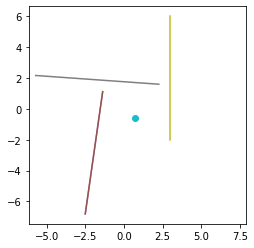

In [152]:
A5 = Point(.7, -.6)
Pl14 = [Segment(Point(3, 6), Point(3, -2))]
R3 = Rotation(1.5, A5)
Pl15 = R3.rotate(Pl14)
R4 = Rotation(3, A5)
Pl16 = R4.rotate(Pl14)
R5 = R3 + R3
Pl17 = R5.rotate(Pl14)
plane_plot([A5], Pl14, Pl15, Pl16, Pl17)

In [177]:
l2 = Pl16[0]
l3 = Pl17[0]
l2.is_similar(l3)

True

 **Theorem 3**

 > Composites of rotations and translations of the plane form a group. If 0 is any chosen point, an element of the group can be written uniquely as a product $T \cdot R$ with T a translation and R a rotation about 0. This group is called the group $E_0$ of proper rigid motions.

 **Corollary**

 > If 0A and 0'A' are congruent segments, with 0 $\neq$ A, there is a unique proper rigid motion taking 0 to 0' and A to A'.

 **Theorem 4**

 > Let l be any line in the plane. Any rigid motion of the plane is either a proper rigid motion P or a composite $P \cdot L$ where L is the reflection in the line l.